In [1]:
# SKRYPT PREZENTUJE DYNAMIKĘ ASOCJACYJNĄ SIECI ADACHIEGO-AIHARY PRZY ZASTOSOWANIU ORYGINALNYCH WZORCÓW
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
import copy
import chaotic_network as cn
get_ipython().magic('matplotlib inline')

In [2]:
N = 100 #rozmiar sieci 
p = 4 #liczba wzorcow w zestawie

In [3]:
###GENEROWANIE WZORCOW ADACHIEGO I AIHARY###
pat = np.zeros((p,N)) #macierz przechowujaca wzorce
A1 = [0,0,0,0,0,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,0,1,1,1,1,1,0,0,
      0,0,0,1,1,0,1,1,0,0,
      0,0,1,1,1,0,1,1,1,0,
      0,0,1,1,0,0,0,1,1,0,
      0,1,1,1,0,0,0,1,1,1,
      0,1,1,1,1,1,1,1,1,1,
      0,1,1,1,1,1,1,1,1,1]
A2 = [0,0,1,1,1,0,0,0,1,1,
      0,1,1,1,1,1,1,1,1,1,
      1,1,1,0,1,1,1,1,0,0,
      1,1,0,0,0,1,1,0,0,0,
      0,0,0,0,0,0,0,0,0,0,
      0,0,0,1,1,0,0,0,1,1,
      0,0,1,1,1,1,0,1,1,1,
      1,1,1,1,1,1,1,1,1,0,
      1,1,0,0,0,1,1,1,0,0,
      0,0,0,0,0,0,0,0,0,0]
A3 = [0,0,1,0,0,0,0,1,0,0,
      0,0,1,1,0,0,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,1,1,1,1,1,0,
      1,1,1,1,1,1,1,1,1,1,
      0,0,0,1,1,1,1,0,0,0,
      0,0,0,0,1,1,0,0,0,0,
      0,0,0,0,0,1,0,0,0,0]
A4 = [1,1,0,0,0,0,0,0,1,1,
      1,1,1,0,0,0,0,1,1,1,
      0,1,1,1,0,0,1,1,1,0,
      0,0,1,1,1,1,1,1,0,0,
      0,0,0,1,1,1,0,0,0,0,
      0,0,0,0,1,1,1,0,0,0,
      0,0,1,1,1,1,1,1,0,0,
      0,1,1,1,0,0,1,1,1,0,
      1,1,1,0,0,0,0,1,1,1,
      1,1,0,0,0,0,0,0,1,1]
pat[0,:] = A1
pat[1,:] = A2
pat[2,:] = A3
pat[3,:] = A4
pat = 2*pat-1 #zamiana 0 na -1

In [4]:
w = cn.hebb(pat) # ustalenie wag

In [5]:
it = 30000 #liczba iteracji sieci
trans = 2000 #czas przejsciowy
mu = np.zeros((p,it)) #macierz przechowujaca przekrycia
s = np.zeros((1,it)) #wektor przechowujacy sredni stan sieci
#warunki poczatkowe
x_0 = np.random.rand(1,N)
eta_0 = np.zeros((1,N))
zeta_0 = np.zeros((1,N))
x = x_0
eta = eta_0
zeta = zeta_0

In [13]:
a = 6.4 #stymulacja - pozostawic bez zmian dla stanu podstawowego; dla stymulacji wzorcem odkomentowac ponizszy fragment; index to indeks wzorca w zestawie
#index = 3
#a = 6.4+pat[index,:]

In [14]:
for i in range(it):
    out = cn.network_step(x, eta, zeta, w, a)
    x = out[0]
    eta = out[1]
    zeta = out[2]
    mu[:,i] = cn.overlap(x,pat,N)
    s[0,i] = np.sum(x)/N

/home/norbert/inz_kod/chaotic_network.py:14: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-y/e))


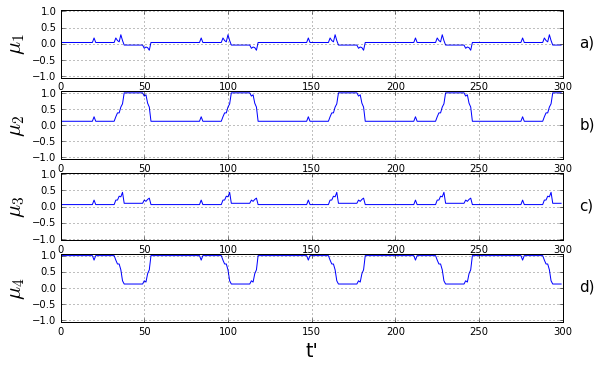

In [15]:
fig_size = [9, 9/1.61]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(4,1,1)
plt.plot(range(300),mu[0,29700:],color='b')
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xlabel("t'",size=19)
plt.ylabel('$\mu_1$',size=22)
plt.ylim(ymax=1.05,ymin=-1.05)
plt.text(310,-0.1,'a)',size=15)
plt.grid(which='major',axis='both')
plt.subplot(4,1,2)
plt.plot(range(300),mu[1,29700:],color='b')
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xlabel("t'",size=19)
plt.ylabel('$\mu_2$',size=22)
plt.ylim(ymax=1.05,ymin=-1.05)
plt.text(310,-0.1,'b)',size=15)
plt.grid(which='major',axis='both')
plt.subplot(4,1,3)
plt.plot(range(300),mu[2,29700:],color='b')
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xlabel("t'",size=19)
plt.ylabel('$\mu_3$',size=22)
plt.ylim(ymax=1.05,ymin=-1.05)
plt.text(310,-0.1,'c)',size=15)
plt.grid(which='major',axis='both')
plt.subplot(4,1,4)
plt.plot(range(300),mu[3,29700:],color='b')
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xlabel("t'",size=19)
plt.ylabel('$\mu_4$',size=22)
plt.ylim(ymax=1.05,ymin=-1.05)
plt.text(310,-0.1,'d)',size=15)
plt.grid(which='major',axis='both')

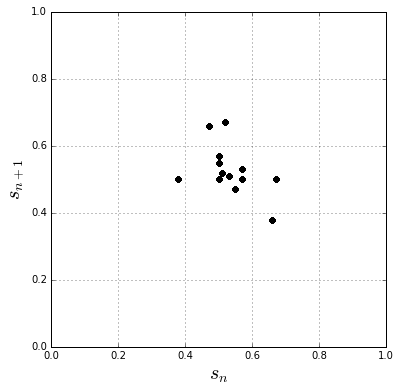

In [16]:
fig_size = [6, 6]
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(s[0,trans:-1],s[0,trans+1:],color='k')
plt.ylim(ymax=1,ymin=0)
plt.xlim(xmax=1,xmin=0)
plt.xlabel('$s_n$', size=20)
plt.ylabel('$s_{n+1}$', size=20)
plt.grid(which='major',axis='both')